# Learn Probabilities Directly

The idea here is instead of training a logistic regression model to maximize the accuracy, we use a custom loss function that maximizes the probability that the observed data came from the assigned probabilities.

That is, given a feature vector $x$ and a label $y\in\{0,1\}$, we want to assign $x\mapsto p\in[0,1]$ (equivalently by sigmoid $x\mapsto f(x)\in\mathbb{R}$) such that the probability of the observed label is maximized. Since the probability of observing $y$ given $p$ is $p^y(1-p)^{1-y}$, we can maximize the log-likelihood:
$$\mathcal{L}(p,y) = y\log(p) + (1-y)\log(1-p)$$
This is equivalent to minimizing the negative log-likelihood:
$$\mathcal{L}(p,y) = -y\log(p) - (1-y)\log(1-p)$$
Since we want to maximize the probability of the observed data, we can use this as our cost function in a gradient descent algorithm.

Below is some ai stuff that didn't really understand what I was getting at, but it is a good start.

Log Loss: 0.3982


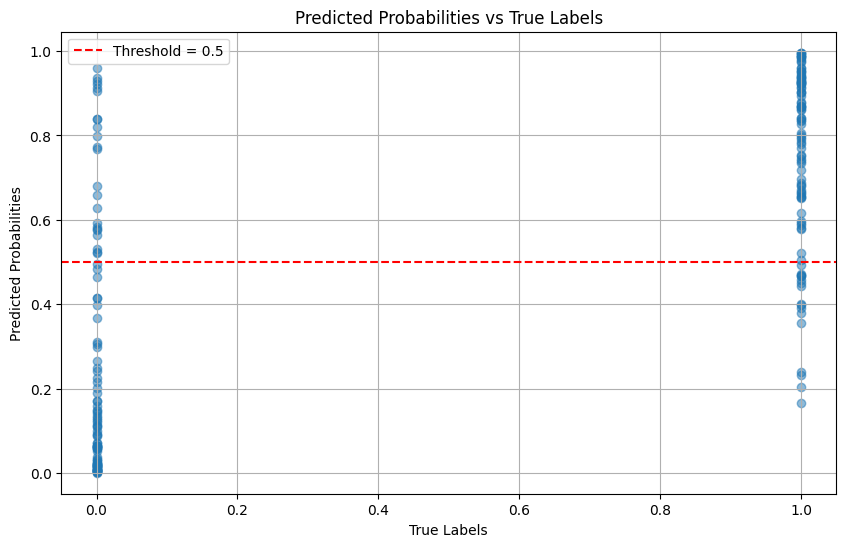

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Create a logistic regression model
model = LogisticRegression(solver='liblinear', random_state=42)
# Fit the model to the training data
model.fit(X_train, y_train)
# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]
# Calculate the log loss
loss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {loss:.4f}")

# Plotting the predicted probabilities against the true labels
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_proba, alpha=0.5)
plt.title('Predicted Probabilities vs True Labels')
plt.xlabel('True Labels')
plt.ylabel('Predicted Probabilities')
plt.axhline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.legend()
plt.grid()
plt.show()
# This code demonstrates how to learn probabilities directly using logistic regression with a custom loss function.
# The model is trained to maximize the likelihood of the observed data, and the log loss is
# calculated to evaluate the model's performance. The scatter plot visualizes the predicted probabilities against the true labels.
# This approach can be useful in scenarios where understanding the probability of an event is more important than just classifying it correctly.
# The model can be further tuned or extended to include more complex features or interactions as needed.
# This code is a simple demonstration and can be adapted for more complex datasets or models.
# The key takeaway is that by using a custom loss function that focuses on maximizing the probability of the observed data,
# we can effectively learn probabilities directly from the data.
# This approach can be particularly useful in applications such as risk assessment, medical diagnosis, or any scenario where understanding the likelihood of an event is crucial.
# The model can be further improved by incorporating regularization techniques, feature selection, or hyperparameter tuning.


Thats all cool but in reality we want to minimize the cost function:

$$\sum_{i} -y_i\log(\sigma(f(x_i))) - (1-y_i)\log(1-\sigma(f(x_i)))$$

where $f$ can be any function that maps the input features to a real number, such as a linear function or a neural network. Lets start with a simple linear function:

In [3]:
X_train.shape

(800, 20)

In [ ]:
def sigmoid(x):
    """Compute the sigmoid function."""
    return 1 / (1 + np.exp(-x))

def cost(theta, X_train, y_train):
    z = X_train @ theta
    p_model = sigmoid(z)
    cost = np.sum(-y_train * np.log(p_model) - (1 - y_train) * np.log(1 - p_model))
    return cost / len(y_train)

Oh this IS just logistic regression... so the above ai stuff is actually correct. I was just dumb and didn't realize it.